This notebook will take the each stem and lemmatized data set; countvectorize and tf-idf then run through logistic regression model.

In [6]:
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# import custom stop words
from customstopwords import custom_stop_words_all

In [7]:
# read in data files
df_lem = pd.read_csv('CommentFiles/Comments_EDA_lem.csv')
df_stem = pd.read_csv('CommentFiles/Comments_EDA_stem.csv')

In [8]:
# convert subreddit into binary labels
df_lem['subreddit'] = df_lem['subreddit'].map({'sportsbook': 1, 'dfsports': 0})
# convert subreddit into binary labels
df_stem['subreddit'] = df_stem['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

Hidden cells are functions that output scores and reports for label data sets and transformers.

In [9]:
# create function to transform and classify 
def transform_classify_cvec(df, name):

    # set X , y
    X = df['body']
    y = df['subreddit']

    #TTS
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    # Instantiate CountVectorizer
    cvec = CountVectorizer(stop_words=custom_stop_words_all)

    # Fit and transform data sets
    X_train_cvec = cvec.fit_transform(X_train.astype(str))
    # transform test data
    X_test_cvec = cvec.transform(X_test.astype(str))

    # model using logistic regression
    logreg = LogisticRegression()

    # fit model to countvectorized data sets
    logreg.fit(X_train_cvec, y_train)

    # print scores and metrics
    # score train and test
    print(name)
    print('')
    print('Train Score    : ', logreg.score(X_train_cvec, y_train))
    print('Test Score     : ', logreg.score(X_test_cvec, y_test))
    print('Cross Val Score: ', cross_val_score(logreg, X_train_cvec, y_train, cv=5).mean())
    print('Accuracy Score : ', accuracy_score(y_test, logreg.predict(X_test_cvec)))
    print('')
    # print and plot confusion matrix
    cm = confusion_matrix(y_test, logreg.predict(X_test_cvec))
    ConfusionMatrixDisplay(cm, display_labels=['sportsbook', 'dfsports']).plot();
    print('')
    # print classification report
    print(classification_report(y_test, logreg.predict(X_test_cvec)))
    pass

In [13]:
# create function to transform and classify 
def transform_classify_tvec(df, name):

    # set X , y
    X = df['body']
    y = df['subreddit']

    #TTS
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    # Instantiate CountVectorizer
    tvec = TfidfVectorizer(stop_words=custom_stop_words_all)

    # Fit and transform data sets
    X_train_tvec = tvec.fit_transform(X_train.astype(str))
    # transform test data
    X_test_tvec = tvec.transform(X_test.astype(str))

    # model using logistic regression
    logreg = LogisticRegression()

    # fit model to countvectorized data sets
    logreg.fit(X_train_tvec, y_train)

    # print scores and metrics
    # score train and test
    print(name)
    print('')
    print('Train Score    : ', logreg.score(X_train_tvec, y_train))
    print('Test Score     : ', logreg.score(X_test_tvec, y_test))
    print('Cross Val Score: ', cross_val_score(logreg, X_train_tvec, y_train, cv=5).mean())
    print('Accuracy Score : ', accuracy_score(y_test, logreg.predict(X_test_tvec)))
    print('')
    # print and plot confusion matrix
    cm = confusion_matrix(y_test, logreg.predict(X_test_tvec))
    ConfusionMatrixDisplay(cm, display_labels=['sportsbook', 'dfsports']).plot();
    print('')
    # print classification report
    print(classification_report(y_test, logreg.predict(X_test_tvec)))
    pass

Lemmatized, TF-IDF

Train Score    :  0.9253826530612245
Test Score     :  0.8444869343530912
Cross Val Score:  0.8273794288556765
Accuracy Score :  0.8444869343530912


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       787
           1       0.84      0.85      0.85       782

    accuracy                           0.84      1569
   macro avg       0.84      0.84      0.84      1569
weighted avg       0.84      0.84      0.84      1569



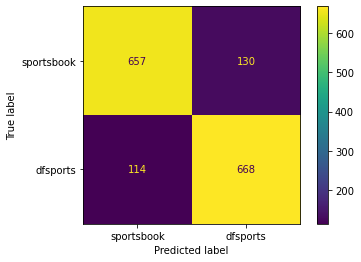

In [15]:
transform_classify_tvec(df_lem, 'Lemmatized, TF-IDF')

## Annotation:
The TD-IDF tranformer did not return a better model.  Very similar scores to count vectorizer with logistic regression.  Going forward different estimators will be used and gridsearch to pick most effective parameters for these transformers.


Train Score    :  0.9287840136054422
Test Score     :  0.82855321861058
Cross Val Score:  0.831844122368689
Accuracy Score :  0.82855321861058


              precision    recall  f1-score   support

           0       0.85      0.80      0.82       792
           1       0.81      0.86      0.83       777

    accuracy                           0.83      1569
   macro avg       0.83      0.83      0.83      1569
weighted avg       0.83      0.83      0.83      1569



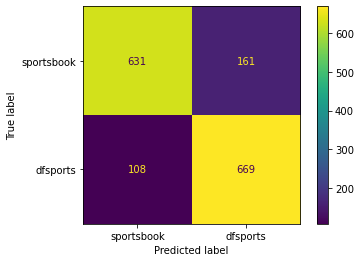

In [21]:
# set X , y
X = df_lem['body']
y = df_lem['subreddit']

#TTS
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate CountVectorizer
tvec = TfidfVectorizer(stop_words=custom_stop_words_all)

# Fit and transform data sets
X_train_tvec = tvec.fit_transform(X_train.astype(str))
# transform test data
X_test_tvec = tvec.transform(X_test.astype(str))

# model using logistic regression
logreg = LogisticRegression()

# fit model to countvectorized data sets
logreg.fit(X_train_tvec, y_train)

# print scores and metrics
# score train and test
#print(name)
print('')
print('Train Score    : ', logreg.score(X_train_tvec, y_train))
print('Test Score     : ', logreg.score(X_test_tvec, y_test))
print('Cross Val Score: ', cross_val_score(logreg, X_train_tvec, y_train, cv=5).mean())
print('Accuracy Score : ', accuracy_score(y_test, logreg.predict(X_test_tvec)))
print('')
# print and plot confusion matrix
cm = confusion_matrix(y_test, logreg.predict(X_test_tvec))
ConfusionMatrixDisplay(cm, display_labels=['sportsbook', 'dfsports']).plot();
print('')
# print classification report
print(classification_report(y_test, logreg.predict(X_test_tvec)))

In [22]:
preds = logreg.predict(X_test_tvec)

In [64]:
pd.DataFrame(columns=['Prediction'], index=X_test, data=preds)

,Prediction
body,
"gt, nba, double, ups, are, much, higher, scoring, than, gpp, s, not, really, i, only, have, example, from, yesterday, and, today, because, i, m, not, diving, too, deep, into, this, but, here, tonight, s, 25, big, double, up, cash, line, 259, 00, tonight, s, 1, 20max, gpp, cash, line, 267, 25, yesterday, s, 25, big, double, up, cash, line, 247, 00, yesterday, s, 1, 20max, gpp, cash, line, 252, 50",0
"i, feel, soooooooo, horrible, for, the, cheater, scumbag, known, a, jim, boehiem, not",1
"i, only, had, 3, lineup, and, he, wa, on, all, of, them",0
"took, the, under, at, the, half, in, the, fsu, and, the, usc, game",1
"you, re, right, i, got, 191, good, call",1
...,...
"did, your, winning, out, win, your, losings",0
"seem, like, nice, guy, with, solid, projection, obscenely, overpriced, imho",0
"is, he, any, relation, to, draymond, green",0


In [105]:
# get input from user
user_input = input('Enter a comment: ')

Enter a comment:  stipe cuse


In [106]:
test_list = list(user_input.split(sep=' '))

In [107]:
test_tvec = tvec.transform(test_list)

In [108]:
str_mean = logreg.predict(test_tvec).mean()

In [109]:
if str_mean >= .5:
    print('The comment you enter is more likely to be found on the sportsbooks subreddit.')
else:
    print('The comment you enter is more likely to be found on the dfsports subreddit.')

The comment you enter is more likely to be found on the sportsbooks subreddit.


In [ ]:
# create function for this